# Aprendizaje no Supervisado - 2do Parcial
Dataset: Patient Survival Prediction

In [2]:
from google.colab import drive
drive.mount('/content/drive')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive


#1. Carga y preparacion de datos

In [13]:
#Carga del Dataset
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasetD1.csv')
print("data1:")
print(data1.head())
X1 = data1.iloc[:, [3, 4]].fillna(data1.iloc[:, [3, 4]].mean()).values

# Normalizar los datos
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)


data1:
   encounter_id  patient_id  hospital_id   age    bmi  elective_surgery  \
0         66154       25312          118  68.0  22.73                 0   
1        114252       59342           81  77.0  27.42                 0   
2        119783       50777          118  25.0  31.95                 0   
3         79267       46918          118  81.0  22.64                 1   
4         92056       34377           33  19.0    NaN                 0   

   ethnicity gender  height           icu_admit_source  ...  \
0  Caucasian      M   180.3                      Floor  ...   
1  Caucasian      F   160.0                      Floor  ...   
2  Caucasian      F   172.7       Accident & Emergency  ...   
3  Caucasian      F   165.1  Operating Room / Recovery  ...   
4  Caucasian      M   188.0       Accident & Emergency  ...   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               0.0       0.0       0.0   
1      

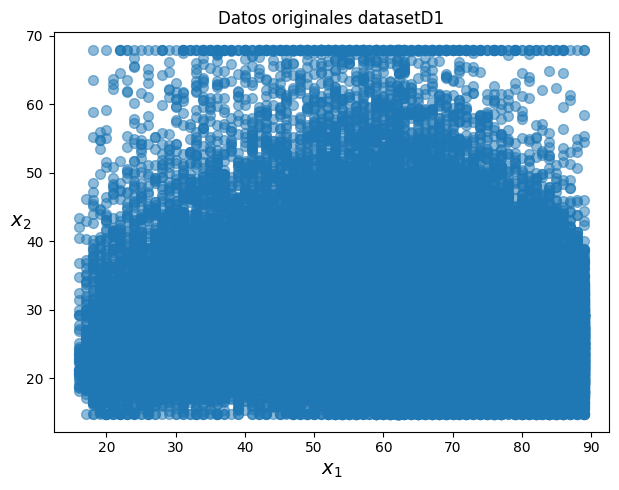

In [4]:
# Visualizar datos originales (antes de K-Means)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], s=50, alpha=0.5)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.title("Datos originales datasetD1")
plt.tight_layout()
plt.show()

#2. Uso de Kmeans para clustering

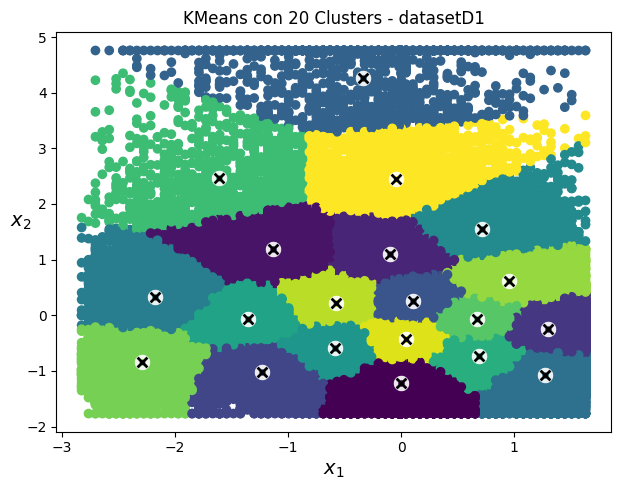

In [20]:
# Establecer hiperparámetros y aplicar K-Means con 20 clusters
kmeans1 = KMeans(n_clusters=20, random_state=42)
y1 = kmeans1.fit_predict(X1_normalized)

# Definir funciones para graficar datos y centroides
def plot_data(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

def plot_centroids(centroids, circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

# Visualizar clusters con centroides
plt.figure(figsize=(12, 5))
# Dataset 1
plt.subplot(1, 2, 1)
plot_data(X1_normalized, y1)
plot_centroids(kmeans1.cluster_centers_)
plt.title("KMeans con 20 Clusters - datasetD1")
plt.tight_layout()
plt.show()

In [21]:
kmeans1.transform(X1_normalized)

array([[0.54333785, 2.47229325, 1.94747601, ..., 1.37227376, 0.47437624,
        3.26350914],
       [1.33994614, 2.46820224, 1.6533448 , ..., 1.53406009, 0.88491286,
        2.82336699],
       [2.75187707, 1.41851404, 2.3031579 , ..., 1.70842931, 2.44235574,
        3.06929827],
       ...,
       [1.3027379 , 1.4468569 , 1.54547763, ..., 0.55194746, 0.93277932,
        2.81045558],
       [0.48467914, 2.22057225, 1.82774634, ..., 1.10776706, 0.29305334,
        3.17048034],
       [1.24948814, 3.11850844, 2.37183319, ..., 2.09010091, 1.24573865,
        3.551454  ]])

#3. Uso de silhouette score para buscar el numero optimo de clusters

Silhouette Score: 0.3298


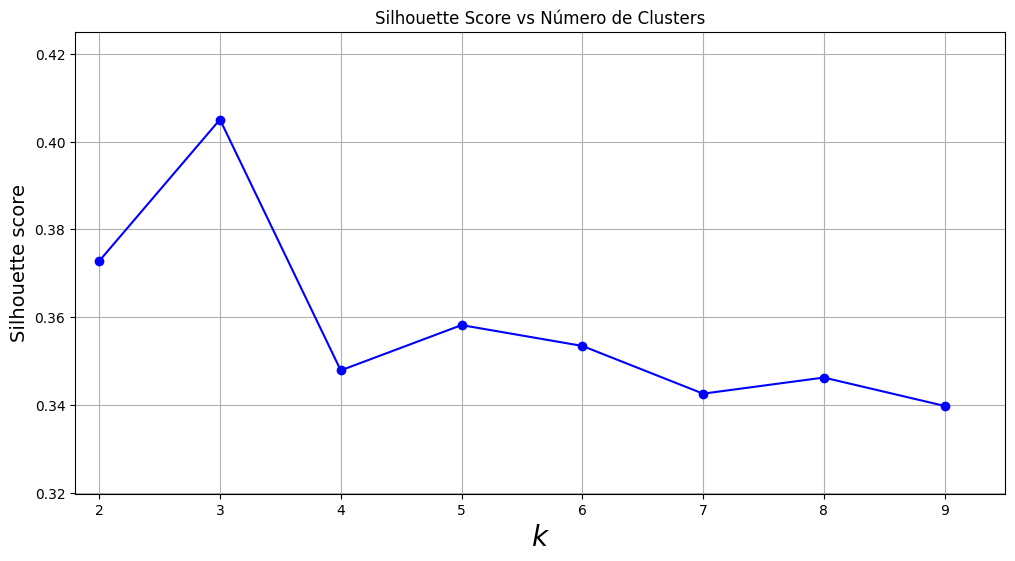

Número óptimo de clusters: 3


In [6]:
# Calcular y mostrar Silhouette Score para 20 clusters
sil_score = silhouette_score(X1_normalized, y1)
print(f"Silhouette Score: {sil_score:.4f}")

# Calcular Silhouette Scores para diferentes valores de k (optimizado)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X1_normalized) for k in range(2, 10)]
silhouette_scores = [silhouette_score(X1_normalized, model.labels_) for model in kmeans_per_k]

# Graficar Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=20)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 9.5, min(silhouette_scores) - 0.02, max(silhouette_scores) + 0.02])
plt.grid(True)
plt.title("Silhouette Score vs Número de Clusters")
plt.show()

# Mostrar el número óptimo de clusters
optimal_k = range(2, 10)[np.argmax(silhouette_scores)]
print(f"Número óptimo de clusters: {optimal_k}")

# 4.Uso del numero optimo de clusters

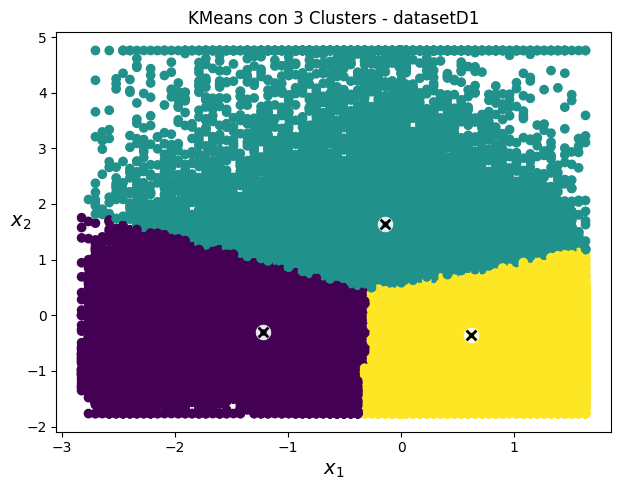

In [18]:
# Aplicar K-Means con el numero opimo de clusters
kmeans2 = KMeans(n_clusters=3, random_state=42)
y2 = kmeans2.fit_predict(X1_normalized)

# Visualizar clusters con centroides
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_data(X1_normalized, y2)
plot_centroids(kmeans2.cluster_centers_)
plt.title("KMeans con 3 Clusters - datasetD1")
plt.tight_layout()
plt.show()

In [19]:
# Calcular y mostrar Silhouette Score para 3 clusters
sil_score = silhouette_score(X1_normalized, y2)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.4050
